<h1> Some simulations and properties of Galton Watson process</h1>

<h2> Introduction </h2>

<p> This project is about studying simple properties of Galton Watson process. This process can be used in order to solve problems about the development of a population under some conditions. Galton, for example, used it to study the extinction of the names of nobles in the past centuries. <p>

<p> We will basically propose a model to answer this similar problem : Considering that Mr.Jerry Smith is the last male named Smith in the world, what is the probability of the survivance of the Smith male in the next generation ? Can we guess the number of Smith male in ten generations ? <p>

<p> This project needs only basic maths, basic Python library and Monte Carlo simulations, and it was my introduction to the Python language.  <p>

<h2> Definition of the model </h2>

<p> We consider the random variable $(X_n)$ which represents the number of male descendants of Mr. Smith after n generations. So, $X_0=1$ as Jerry Smith is the only Smith male at the beginning, $X_1$ represents the number of sons of Mr. Smith, $X_2$ is grandsons...<p>
* Asumption 1 : $(X_n)$ is a Markov Chain, you only need to know $ X_{n-1}$ to predict $X_n$, even if you have informations about every previous $X_k$ 
* Asumption 2 : we know the probability for a male of every generation $n$ to have $k$ sons, for every $k \in N$. We note this probability $p_k^n$, $(k,n) \in N^2$
* Asumption 3 : Independance between the number of sons of every member of the family

Basically, this means that in our model we do not consider collective behaviours : your probability of having no child is the same if your brothers already have 1 son or 10 sons. We also first consider that all of the laws are known at the beginning of the experience, and that the fact that your father and your grand-father imply no change in your law of probability.

This leads to the following process :

* $ \forall n \in N $ , $ X_{n+1}=\sum_{k=1}^{X_n} Y_k$ , where $ \forall k $ , $Y_k$ is a random variable following $(P_k^n)_{k \in N}$

## First samplings

I first consider that $(p_k^n)$ is constant over the time, and we take the probability law from the french National Institute of Statistics and Economic Studies (Insee). With our data the average number of sons of our individuals will be 1.023. 

I first import the libraries and the law of probability.

In [17]:
import numpy as np
import numpy.random as rd
import scipy.stats as sp
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

P = np.array([0.312,0.416,0.215,0.051,0.006])
Values = np.array([0,1,2,3,4])
nb_mean = sum(P*Values)
nb_sd=np.sqrt(sum(P*Values**2))

print(nb_mean,nb_sd)

def nb_sons_INSEE(nb_fathers) :
    return (rd.choice(Values, p=P, size=nb_fathers))

Probability_law=nb_sons_INSEE

1.023 1.353144486


I first implement a class which allows to create a new generation knowking the informations about the previous generation. I choose to create objects because it seems the easiest way to keep at every time the most informations if I choose to analyze the properties of my process in a second time. 

In [18]:
class generation :
    def __init__(self,previous_gen):
        self.previous_gen = previous_gen
        self.nb_fathers = 1
        if previous_gen != 0 :
               self.nb_fathers = previous_gen.nb_indiv
        self.law=Probability_law
        self.list_indiv=self.law(self.nb_fathers)
        self.nb_indiv=sum(self.list_indiv)

Jerry_sons = generation(0)
Jerry_sons

In [19]:
print("number of sons of Jerry:", Jerry_sons.nb_indiv)

gen1 = generation(Jerry_sons)
print("grandsons :", gen1.list_indiv, "number of grandsons : ", gen1.nb_indiv)

number of sons of Jerry: 1
grandsons : [2] number of grandsons :  2


I know create a class for the sampling of a complete genealogy tree. I add some interesting statistics in the properties of the class.

In [20]:
class Simulation :
    def __init__(self,n):
        self.nb_gen=n
        self.generations=[generation(0)]
        self.generations=self.get_generations(self.generations)
        self.nb_by_gen=self.get_list_nb_indiv()
        self.Is_extinct=(0 in self.nb_by_gen)
        self.extinction_time="Not extinct"
        if self.Is_extinct :
            self.extinction_time=self.nb_by_gen.index(0)
        
    def get_generations(self,G):
        for i in range(self.nb_gen-1):
            G.append(generation(G[-1]))
        return(G)
    
    def get_list_nb_indiv(self):
        L=[1]
        for x in self.generations :
            L.append(x.nb_indiv)
        return(L)
    
    def graph(self):
        colors=["red","blue","green","yellow","purple","navy","pink","orange"]
        plt.plot(self.nb_by_gen,color=rd.choice(colors))
    

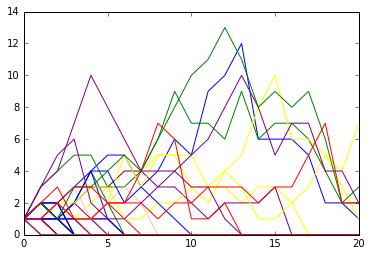

[[True, 3], [True, 1], [True, 6], [False, 'Not extinct'], [False, 'Not extinct'], [False, 'Not extinct'], [True, 1], [True, 3], [True, 1], [True, 5], [True, 2], [True, 1], [True, 16], [True, 1], [True, 8], [True, 6], [True, 6], [True, 5], [True, 3], [True, 1], [True, 1], [True, 7], [True, 1], [True, 3], [True, 6], [True, 2], [True, 1], [True, 5], [True, 2], [True, 2], [False, 'Not extinct'], [True, 1], [True, 3], [True, 3], [True, 1], [True, 17], [True, 1], [True, 10], [True, 3], [True, 13], [True, 3], [False, 'Not extinct'], [True, 4], [True, 1], [True, 1], [True, 13], [True, 1], [False, 'Not extinct'], [True, 4], [False, 'Not extinct']]


In [21]:
Results=[]
for x in range(50) :
    S=Simulation(20)
    S.graph()
    Results.append([S.Is_extinct,S.extinction_time])
plt.show()
print(Results)

Now that we have a class for simulations, we create a new class for Monte Carlo Simulation. What can we observe while simulating a lot of genealogy trees ?

In [22]:
class MC_simul :
    def __init__(self,N,n):
        self.nb_simul=N
        self.nb_gen=n
        self.Simul=self.get_simul(N,n)
        self.Extinct_rate=sum(x.Is_extinct for x in self.Simul)/self.nb_simul
        self.Extinct_times=[x.extinction_time for x in self.Simul]
        self.list_times = list(filter(lambda x: x != "Not extinct", self.Extinct_times))
        self.mean_times = np.mean(self.list_times)
        self.sd_times = np.std(self.list_times)
    
    def get_simul(self,N,n):
        S=[]
        for x in range(N):
            S.append(Simulation(n))
        return(S)
    
    def plot(self):
        for x in self.Simul:
            x.graph()
        plt.show()
    

0.95
[2, 2, 1, 2, 2, 2, 3, 2, 3, 1, 1, 3, 1, 9, 3, 1, 4, 3, 26, 4, 1, 4, 12, 2, 4, 4, 3, 1, 1, 1, 1, 1, 2, 1, 6, 1, 1, 2, 12, 1, 1, 2, 1, 4, 7, 1, 1, 1, 1, 1, 9, 1, 6, 2, 2, 1, 1, 3, 1, 1, 5, 5, 3, 3, 5, 3, 3, 1, 4, 4, 1, 6, 2, 3, 1, 5, 2, 22, 14, 20, 9, 1, 1, 7, 13, 3, 3, 5, 2, 2, 2, 2, 1, 1, 1]
3.66315789474 4.44050856811


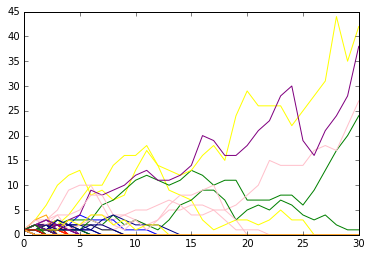

In [23]:
MC_sample=MC_simul(100,30)
print(MC_sample.Extinct_rate)
print(MC_sample.list_times)
print(MC_sample.mean_times,MC_sample.sd_times)
MC_sample.plot()


If we consider our sample of extinction rate as a Monte Carlo estimator for the probability of the extinction of the Smith name, Jerry Smith has only 10% of chance to have a Smith descendant in 30 generations. The average extinction date is after 5 generations, but the standart deviation is very high.

Now we can do the same with different law of probability to check the behaviours of our process behind different probabilities. We can for example use a Poisson law with different means

1.0
1.394 0.755489245456


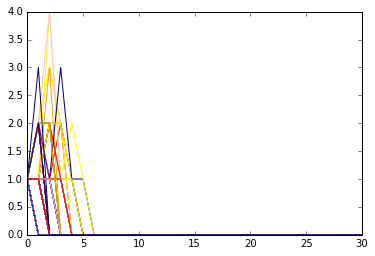

In [24]:
def Poisson_sample(nb_fathers) :
    return (rd.poisson(lambd,size=nb_fathers))

Probability_law=Poisson_sample

lambd= 0.3

MC_sample=MC_simul(1000,30)
print(MC_sample.Extinct_rate)
print(MC_sample.mean_times,MC_sample.sd_times)
MC_sample.plot()

0.936
4.13141025641 5.19808854358


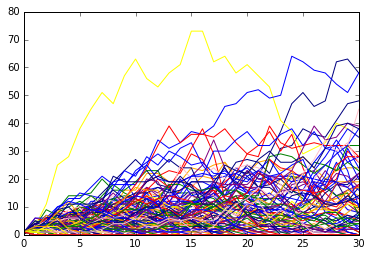

In [25]:
lambd=1

MC_sample=MC_simul(1000,30)
print(MC_sample.Extinct_rate)
print(MC_sample.mean_times,MC_sample.sd_times)
MC3=MC_sample.plot()

0.199
1.52763819095 0.970929177172


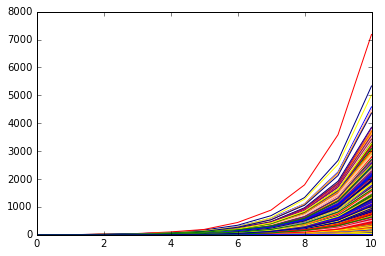

In [26]:
lambd=2

MC_sample=MC_simul(1000,10)
print(MC_sample.Extinct_rate)
print(MC_sample.mean_times,MC_sample.sd_times)
MC_sample.plot()

Given a law of probability for the number of sons of every individual at every generation, it seems that we are able to give a numerical estimator of the probability of extinction of the family name Smith, and of the expectation and standard deviation we can check out the maths to verify these estimators.

## Mathematical properties